# Satistische Analyse 

Ik heb voor deze opdracht gekeken naar de bevolkingsgroei en naar de totale vestiging. Ik zal eerst mijn code laten zien en uitleg geven. 

In [1]:
import csv
import math
import matplotlib.pyplot as plt

filename = 'utrecht.csv'

columns = {}
rows = []
data = {}
time = []

# hulp functie om te kijken of de waarde een integer is
def is_number(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

Deze functie is overgenomen uit een voorbeeld (canvas)

In [2]:
def average(arr):
    total = 0
    for item in arr:
        total += item
    avg = total/(len(arr))
    return avg

Iedere waarde uit een meegegeven array worden bij elkaar opgeteld. Daarna wordt de totale optelling gedeeld door het aantal waardes in de array. Zo krijg je de gemiddelde waarde van de array. 

In [3]:
def modus(arr):
    occurances = {}
    highestOccurance = 0
    highestOccuranceKey = 0

    for item in arr:
        if item in occurances:
            occurances[item] += 1
        else:
            occurances[item] = 1

    for key, val in occurances.items():
        if val > highestOccurance:
            highestOccurance = val
            highestOccuranceKey = key

    return highestOccuranceKey

Het aantal keer dat een waarde voorkomt wordt in een dictionary opgeslagen. Iedere waarde wordt gebruikt als een key in de dictionary. Hierdoor kan je controleren of een waarde al eerder is voorgekomen. Als dit het geval is, dan wordt er bij het aantal keer dat die waarde is voorgekomen +1 bij opgeteld. 

In een tweede for loop wordt daarna gezocht naar de waarde in de dictionary die het meest voorkomt (oftewel: de hoogste waarde in de dictionary). De key van deze waarde is de modus en deze wordt uiteindelijk gereturned. 

In [4]:
def median(arr):
    copy = sorted(arr[:])
    med = 0
    if len(copy) % 2 == 0:
        num1 = copy[int((len(copy)-1)/2)]
        num2 = copy[int((len(copy)-1)/2)+1]
        med = (num1+num2)/2
    else:
        med = copy[int((len(copy)-1)/2)]
    return med

Een kopie van de array wordt gesorteerd (van klein naar groot). Als de array een even aantal waarden heeft, dan worden de twee middelste waarden uit de array gehaald, bij elkaar opgeteld, en daarna gedeeld door twee. Dit is de mediaan in een array met een even aantal waarden. 

Heeft de array een oneven aantal waarden, dan wordt gewoon de middelste waarden van de array gereturned als de mediaan.  

In [5]:
def deviation(arr):
    avg = average(arr)
    total = 0
    for item in arr:
        dist = avg-item
        total += (dist*dist)

    dev = math.sqrt(total/len(arr))
    return dev

Het gemiddelde van de array wordt berekend, en daarna wordt voor iedere waarde in de array gekeken hoeveel deze afwijkt van het gemiddelde. Deze afwijking wordt (in het kwadraat) opgeteld bij de totale afwijking. Dit totaal wordt gedeeld door lengte van de array en van deze uitkomst wordt daarna de wortel van genomen. Deze berekende waarde wordt gereturned als de standaard deviatie. 

In [6]:
def trend_line(var):
    minimum = min(var) #y = ax + b
    maximum = max(var)
    a = (maximum - minimum)/len(var)
    x = 0
    b = (minimum - a)
    trend = []

    for x in range(len(var)):
        y = (a * x) + b
        trend.append(y)
        x += 1
    return trend

De minimum en maximum van de array worden in een variabele opgeslagen. 

De formule voor het berekenen van de trendlijn is 'y = (a * x) + b' 

a = maximum - minimum gedeelt door het totaal aantal waardes in de array
b = minimum - a

Uiteindelijk wordt iedere berekende 'y' toegevoegd aan een 'trend' array en deze wordt op het einde gereturned. 

In [7]:
with open(filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        # anders reageren als het de eerste regel is, dat zijn namelijk de kolomnamen
        if line_count == 0:
            line_count += 1
            i = 0
            for c in row:
                columns[c] = i
                data[i] = []
                i += 1
        else:
            line_count += 1
            # alleen importeren als het maanddata is, niet de cummulatieven over een jaar
            if 'JJ00' in row[columns['Perioden']]:
                pass
            else:
                rows.append(row)
                i = 0
                for c in row:
                    if is_number(c):
                        data[i].append(int(c))
                    else:
                        data[i].append(c)
                    i = i + 1

    years = {}
    for i in data[columns['Perioden']]:
        if i not in years:
            time.append(int(i[:-4]))
            years[i[:-4]] = 0


Code komt grotendeels van canvas af. Alleen de laatste for-loop heb ik voor mezelf toegevoegd, om de verstreken tijd ook gewoon als integer te hebben. 

Average population growth: 450.3252427184466
Median population growth: 360.0
Modus population growth: 324
Standard deviation population growth: 436.0793060986331



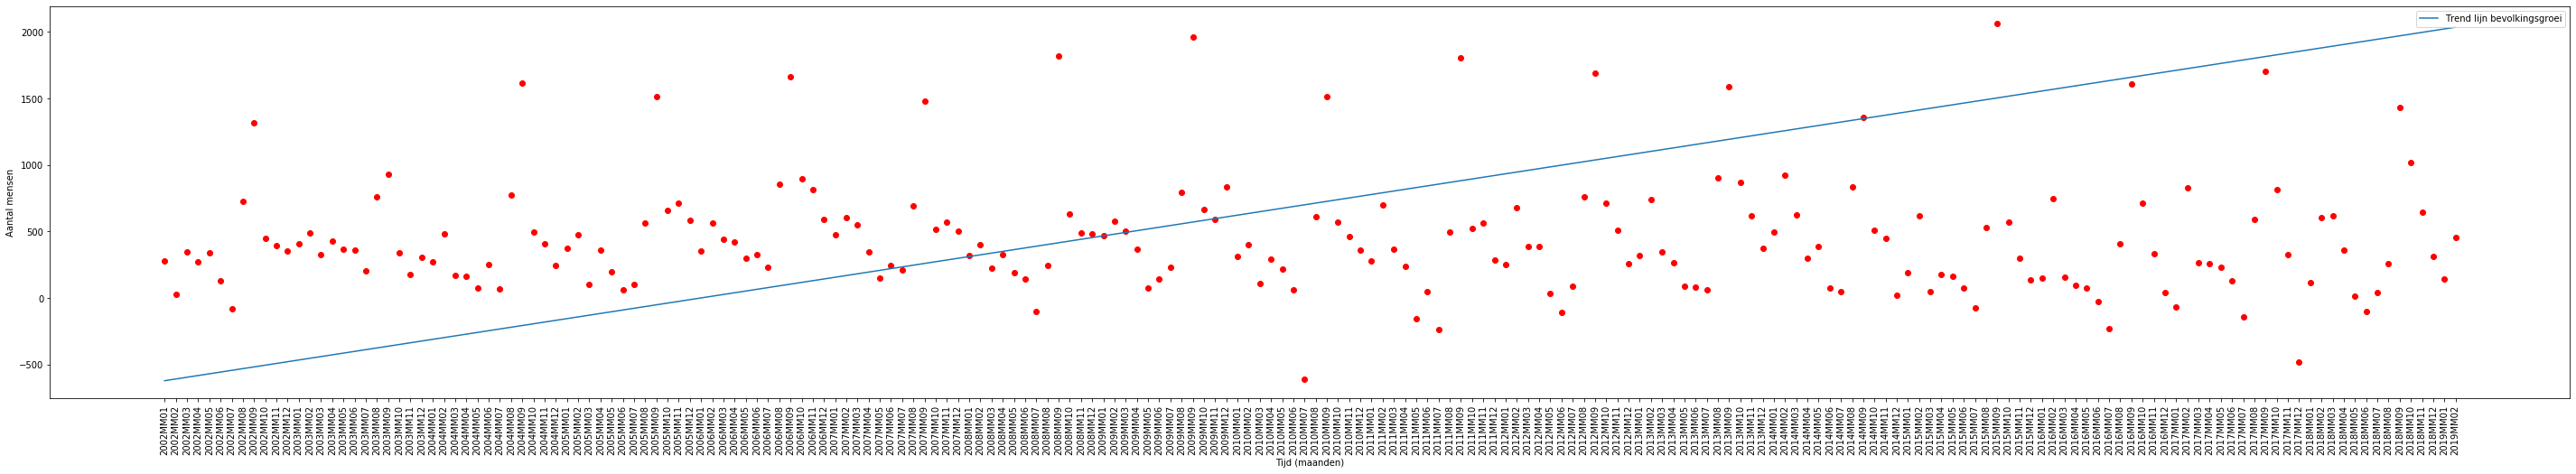

In [8]:
growth = data[columns['Bevolkingsgroei_11']]
totalV = data[columns['TotaleVestiging_4']]

plt.figure(1, figsize=(50,8))
plt.plot( data[columns['Perioden']], growth, 'ro')
plt.plot( data[columns['Perioden']], trend_line(growth), label = 'Trend lijn bevolkingsgroei')
plt.legend();
plt.xticks(rotation=90)
plt.xlabel('Tijd (maanden)')
plt.ylabel('Aantal mensen')

print("Average population growth:", average(growth))
print("Median population growth:", median(growth))
print("Modus population growth:", modus(growth))
print("Standard deviation population growth:", deviation(growth))
print()

Het plotten van de eerste grafiek (met trendlijn) + het gemiddelde, mediaan, modus en standaarddeviatie van de bevolkingsgroei.

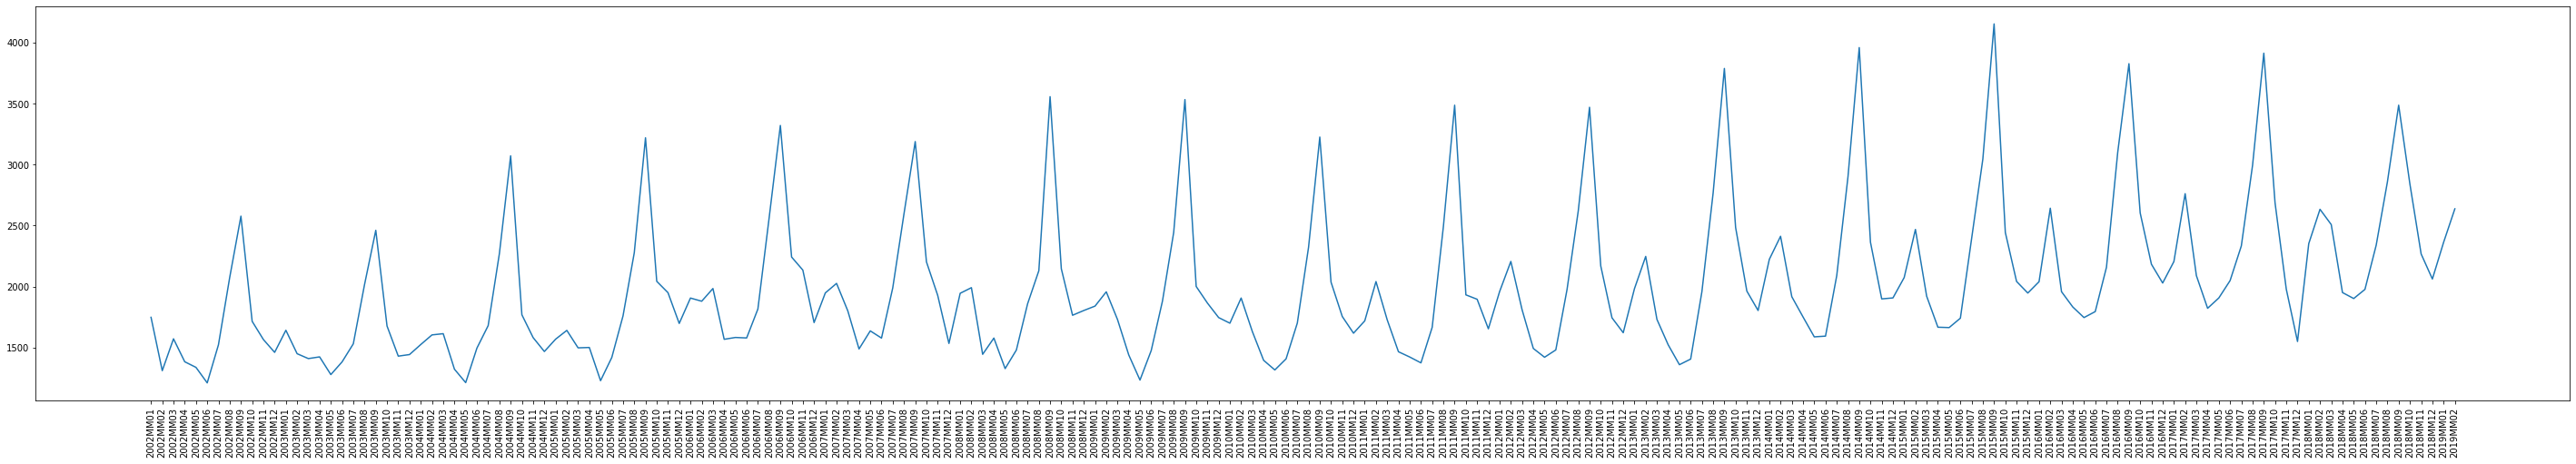

Average population growth-relative: 2008.8640776699028
Median population growth-relative: 1900.5
Modus population growth-relative: 1523
Standard deviation population growth-relative: 589.8542776853967


In [10]:
plt.figure(2, figsize=(50, 8))
plt.plot(data[columns['Perioden']], totalV)
plt.xticks(rotation=90)
plt.show()

print("Average population growth-relative:", average(totalV))
print("Median population growth-relative:", median(totalV))
print("Modus population growth-relative:", modus(totalV))
print("Standard deviation population growth-relative:", deviation(totalV))

Het plotten van de tweede grafiek (zonder tendlijn) + het gemiddelde, mediaan, modus en standaarddeviatie van de totale vestiging

Conclusie: in de eerste grafiek kan je duidelijk de conclusie trekken dat de bevolking in de gemeente Utrecht aan het toenemen is. De trendlijn in de grafiek geeft dit het duidelijkst aan. 

In de tweede grafiek kan je de conclusie trekken dat de totale vestiging steeds meer toeneemt. Als je een trendlijn zou tekenen dan zou je zien dat de totale vestiging, ook al zijn er vaak flinke dalen, eigenlijk alleen maar aan het toenemen is. Dit is logisch, want de bevolking in de gemeente Utrecht neemt ook steeds verder toe. 